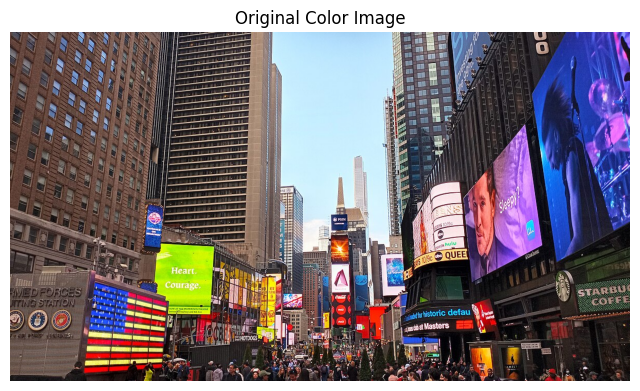

Original Image Shape: (675, 1200, 3)


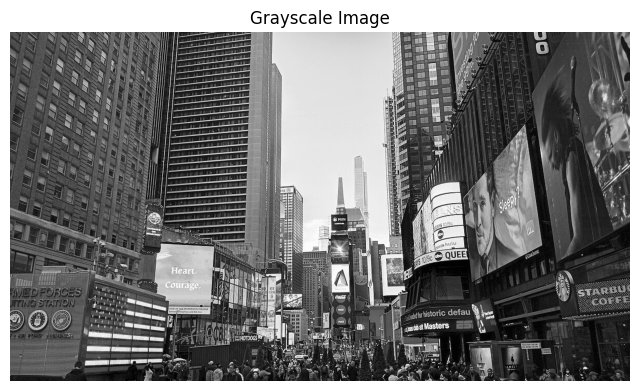

Grayscale Image Shape: (675, 1200)
Number of components covering 95% variance: 201


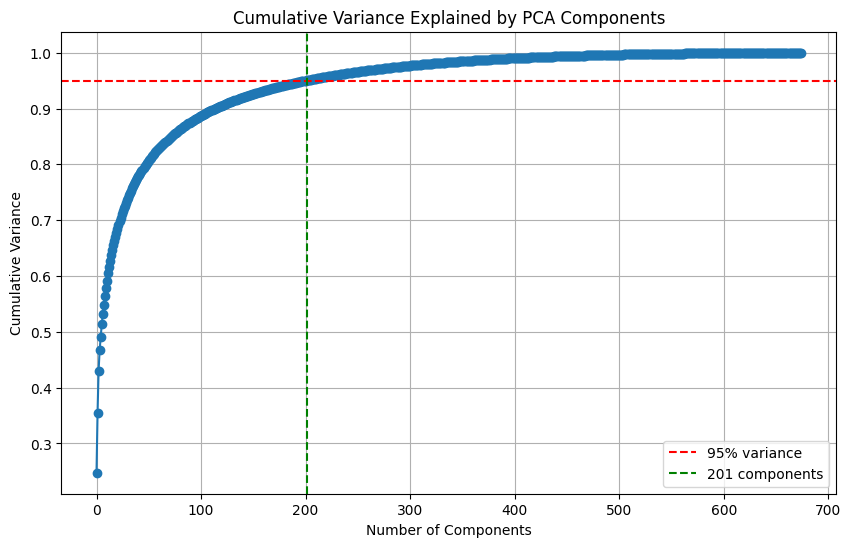

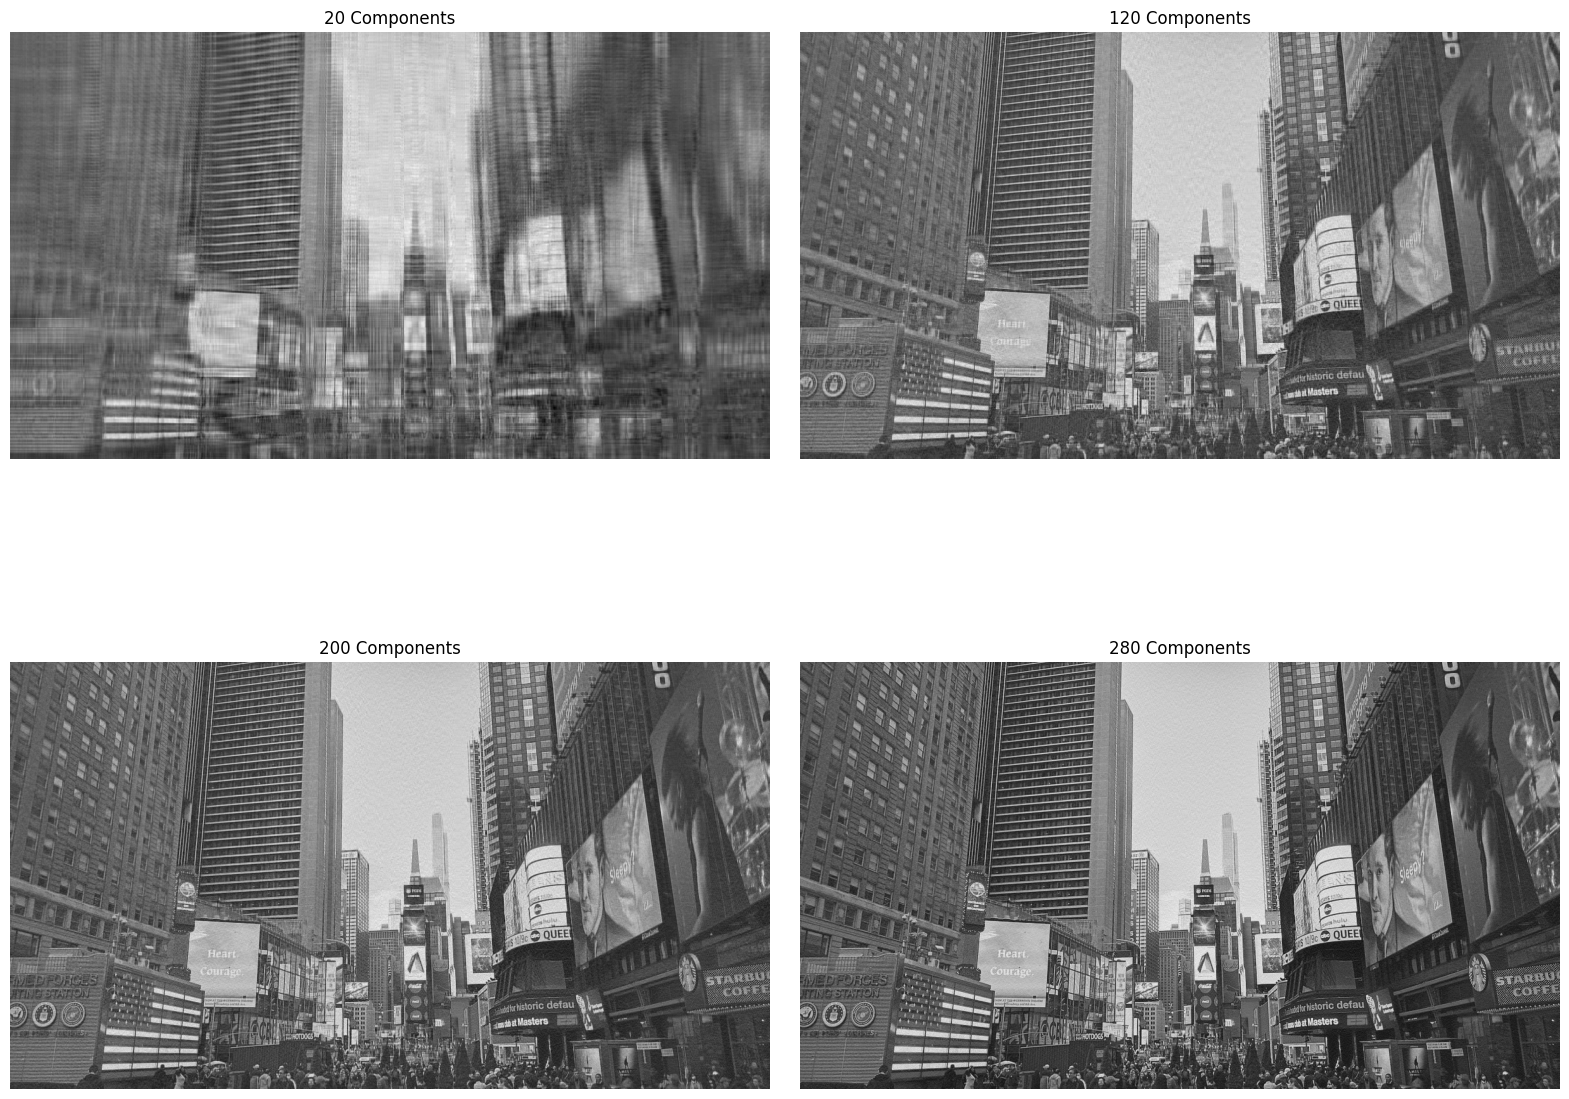

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

image = cv2.imread('images/times_square.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')
plt.show()

print(f"Original Image Shape: {image_rgb.shape}")

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print(f"Grayscale Image Shape: {image_gray.shape}")

h, w = image_gray.shape

pca = PCA()
pca.fit(image_gray)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components covering 95% variance: {num_components_95}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f'{num_components_95} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.legend()
plt.grid(True)
plt.show()

test_components = [20, 120, 200, 280]
reconstructed_images = []

for num_components in test_components:
    pca = PCA(n_components=num_components)
    transformed_image = pca.fit_transform(image_gray)
    reconstructed_image = pca.inverse_transform(transformed_image)
    reconstructed_image = reconstructed_image.reshape(h, w)
    reconstructed_images.append(reconstructed_image)


plt.figure(figsize=(20, 15))
for i in range(len(reconstructed_images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'{test_components[i]} Components')
    plt.axis('off')

plt.subplots_adjust(wspace=0.04, hspace=0.2)
plt.show()
